In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import topRanking
import analysis
import imageLibs
#import blackCow
import numpy as np

# Error In Top N neighbour
For each image, we look at the neighbour and count number of wrong match
![title](errorInTopN.png)

In [3]:
#bmap=blackCow.loadBlackCowDict()
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_top100_top100InTraining.fv.best100DistancePerImg.pkl')
eitDict=analysis.loadPkl('cowId.faceBennett.20200801-20200821_model_1000_epoch120.fv.best100DistancePerImg.pkl')
numTop=5
excluded,errorTop=topRanking.errorTopN(eitDict,numTop,excludeList=analysis.excludeImage)
status=[]
for index, row in errorTop.iterrows():
    eid=analysis.getEid(row['imgPath'])
    #status.append(blackCow.isBlackCow(bmap,eid))

#errorTop['isBlack']=status
    

96 cows have less than 5 images. They are excluded.


In [4]:
haveError=errorTop.loc[errorTop['errorCount']>0]
numError=len(haveError['errorCount'])
numImg=len(errorTop) - len(excluded)
percentError=numError/numImg*100
print(f"{percentError:5.2f}% ({numError}/{numImg}) images have an error in the top 5 closest images (erroInTop5)")

#numBlackImg=len(haveError[haveError.isBlack==True])
#print("{:5.2f}% ({}/{}) problematic images is from black cow".format(numBlackImg/numError*100,numBlackImg,numError))


21.33% (2780/13036) images have an error in the top 5 closest images (erroInTop5)


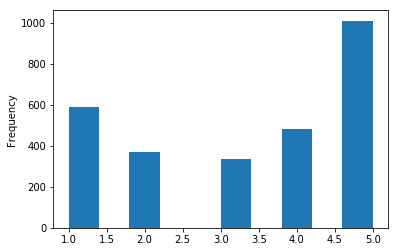

In [5]:

haveError=errorTop.loc[errorTop['errorCount']>0]
haveError['errorCount'].plot.hist()

### Image with all top 5 wrong eid

Per line: first image: ref image. 5 following image are the closest image to the ref image (they are all the wrong cow because we are looking at cow that have 5 errors)


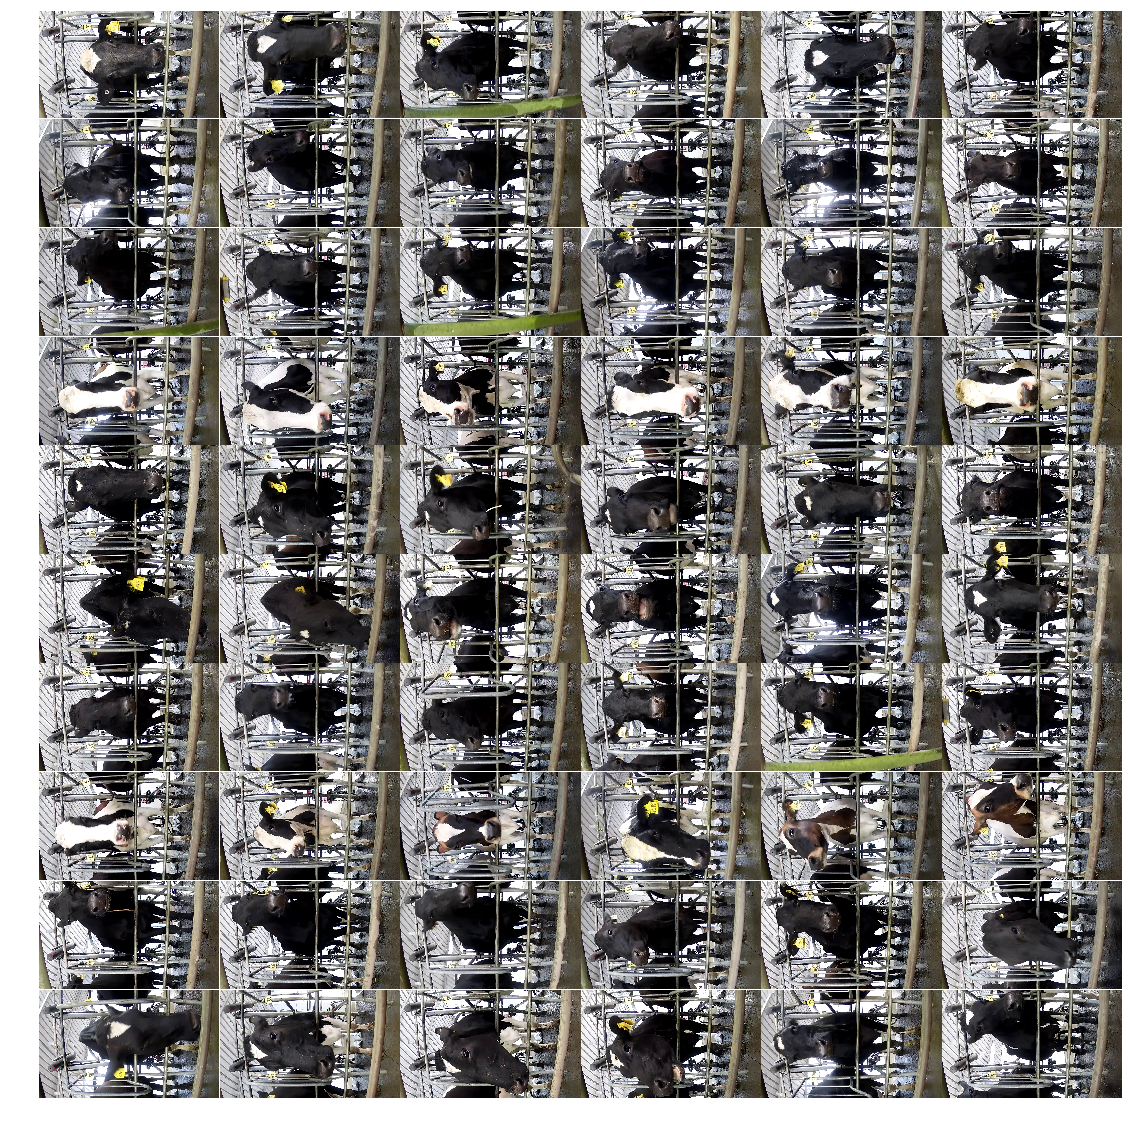

In [6]:
print("Per line: first image: ref image. 5 following image are the closest image to the ref image (they are all the wrong cow because we are looking at cow that have 5 errors)")
analysis.show(topRanking.plotSomeError(errorTop,10,eitDict,5),'')

# Matching-cluster Index
For each image, we calculate the distance to every cluster. We then order the cluster based on their distance to the image. The index is the index of the cluster which the cow belong to. Expecting index = 0. Index 5 means that there are 5 other cows that are closer to the image than the right cluster which the cow belong to.
![title](matchingClusterIndex.png)


In [7]:
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_top100_top100InTraining.fv.ranking.pkl")
mciDf=analysis.loadPkl("cowId.faceBennett.20200801-20200821_model_1000_epoch120.fv.ranking.pkl")
status=[]
for index, row in mciDf.iterrows():
    eid=analysis.getEid(row['path'])
    #status.append(blackCow.isBlackCow(bmap,eid))
#mciDf['isBlack']=status
badDf=mciDf[mciDf['rank']>0]
goodDf=mciDf[mciDf['rank']==0]
numImg=len(mciDf)
nBad=len(badDf)



In [8]:
print("{:5.2f}% ({}/{}) have matching-cluster index > 0".format(nBad/numImg*100,nBad,numImg))

 8.28% (1108/13380) have matching-cluster index > 0


## 50 images that have the Worst Matching-Cluster Index

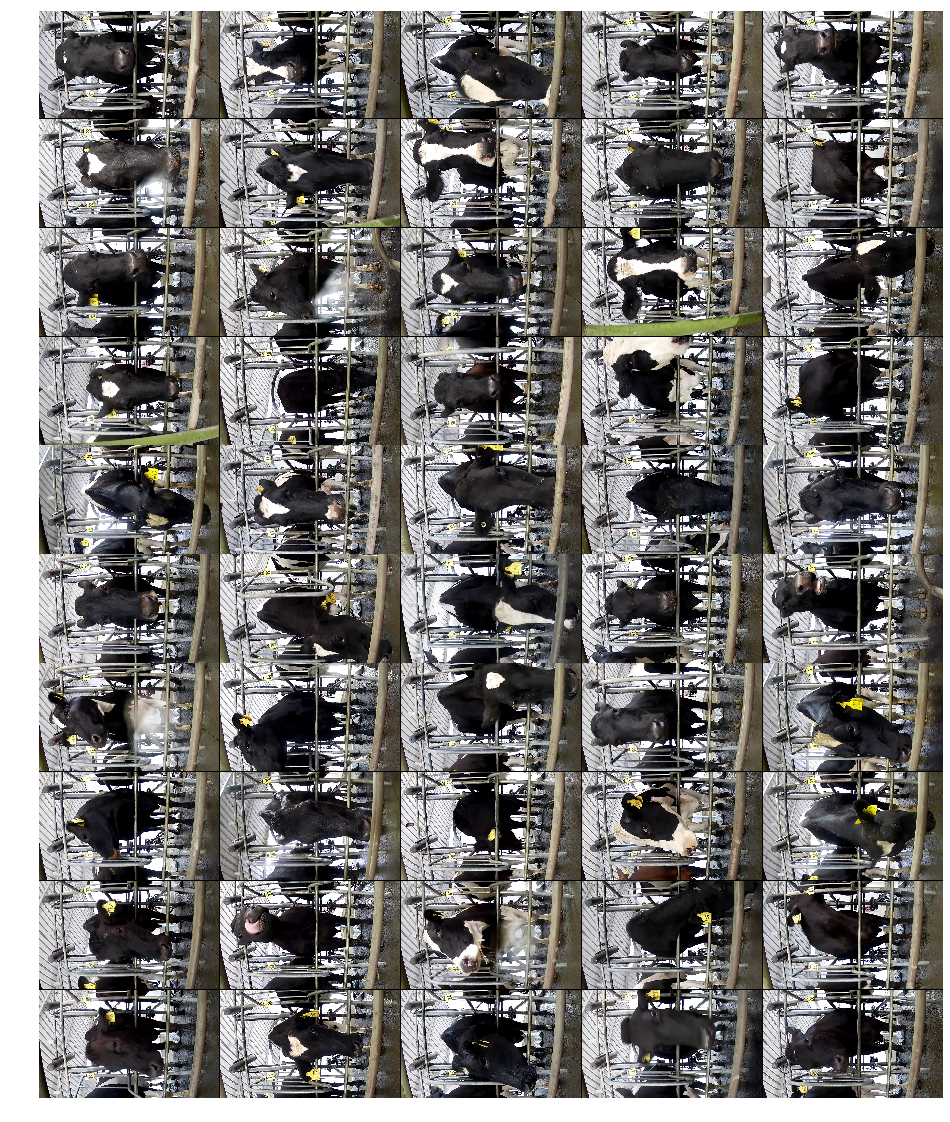

path  rank
0   cowId.faceBennett.20200801-20200821/9821234751...   858
1   cowId.faceBennett.20200801-20200821/9820910011...   786
2   cowId.faceBennett.20200801-20200821/9821235465...   710
3   cowId.faceBennett.20200801-20200821/9821235530...   497
4   cowId.faceBennett.20200801-20200821/9821237393...   441
5   cowId.faceBennett.20200801-20200821/9821235205...   427
6   cowId.faceBennett.20200801-20200821/9821235205...   364
7   cowId.faceBennett.20200801-20200821/9821235442...   349
8   cowId.faceBennett.20200801-20200821/9821235319...   325
9   cowId.faceBennett.20200801-20200821/9821235319...   267
10  cowId.faceBennett.20200801-20200821/9821237393...   238
11  cowId.faceBennett.20200801-20200821/9821235442...   226
12  cowId.faceBennett.20200801-20200821/9821235319...   204
13  cowId.faceBennett.20200801-20200821/9821235530...   189
14  cowId.faceBennett.20200801-20200821/9821234769...   188
15  cowId.faceBennett.20200801-20200821/9821237144...   188
16  cowId.faceBennett.20200801-20200821/9821237144...   180
17  cowId.faceBennett.20200801-20200821/9821235306...   153
18  cowId.faceBennett.20200801-20200821/9821235205...   150
19  cowId.faceBennett.20200801-20200821/9821237393...   144
20  cowId.faceBennett.20200801-20200821/9821235205...   140
21  cowId.faceBennett.20200801-20200821/9820910121...   135
22  cowId.faceBennett.20200801-20200821/9821234852...   135
23  cowId.faceBennett.20200801-20200821/9821235530...   131
24  cowId.faceBennett.20200801-20200821/9820910132...   126
25  cowId.faceBennett.20200801-20200821/9820910047...   125
26  cowId.faceBennett.20200801-20200821/9821235205...   123
27  cowId.faceBennett.20200801-20200821/9821235319...   123
28  cowId.faceBennett.20200801-20200821/9821235319...   118
29  cowId.faceBennett.20200801-20200821/9821234785...   115
30  cowId.faceBennett.20200801-20200821/9821235530...   113
31  cowId.faceBennett.20200801-20200821/9821234785...   108
32  cowId.faceBennett.20200801-20200821/9821234785...   103
33  cowId.faceBennett.20200801-20200821/9821235205...   102
34  cowId.faceBennett.20200801-20200821/9821235319...   101
35  cowId.faceBennett.20200801-20200821/9821235530...   101
36  cowId.faceBennett.20200801-20200821/9821235213...    91
37  cowId.faceBennett.20200801-20200821/9821235530...    91
38  cowId.faceBennett.20200801-20200821/9821235205...    88
39  cowId.faceBennett.20200801-20200821/9821235217...    87
40  cowId.faceBennett.20200801-20200821/9821235530...    83
41  cowId.faceBennett.20200801-20200821/9821235530...    80
42  cowId.faceBennett.20200801-20200821/9820910011...    80
43  cowId.faceBennett.20200801-20200821/9821237144...    78
44  cowId.faceBennett.20200801-20200821/9821235530...    78
45  cowId.faceBennett.20200801-20200821/9821235530...    78
46  cowId.faceBennett.20200801-20200821/9821237144...    75
47  cowId.faceBennett.20200801-20200821/9821235205...    74
48  cowId.faceBennett.20200801-20200821/9820910047...    73
49  cowId.faceBennett.20200801-20200821/9821235530...    72

In [9]:
#badDf=dfRanking[dfRanking['rank']>0]
badDf=analysis.dfSort(badDf,'rank',ascending=False)
img=imageLibs.mosaic(badDf[:50]['path'],numCol=5,margin=5,cropx0y0x1y1=analysis.cropCoords)
analysis.show(img,'')
badDf[:50]

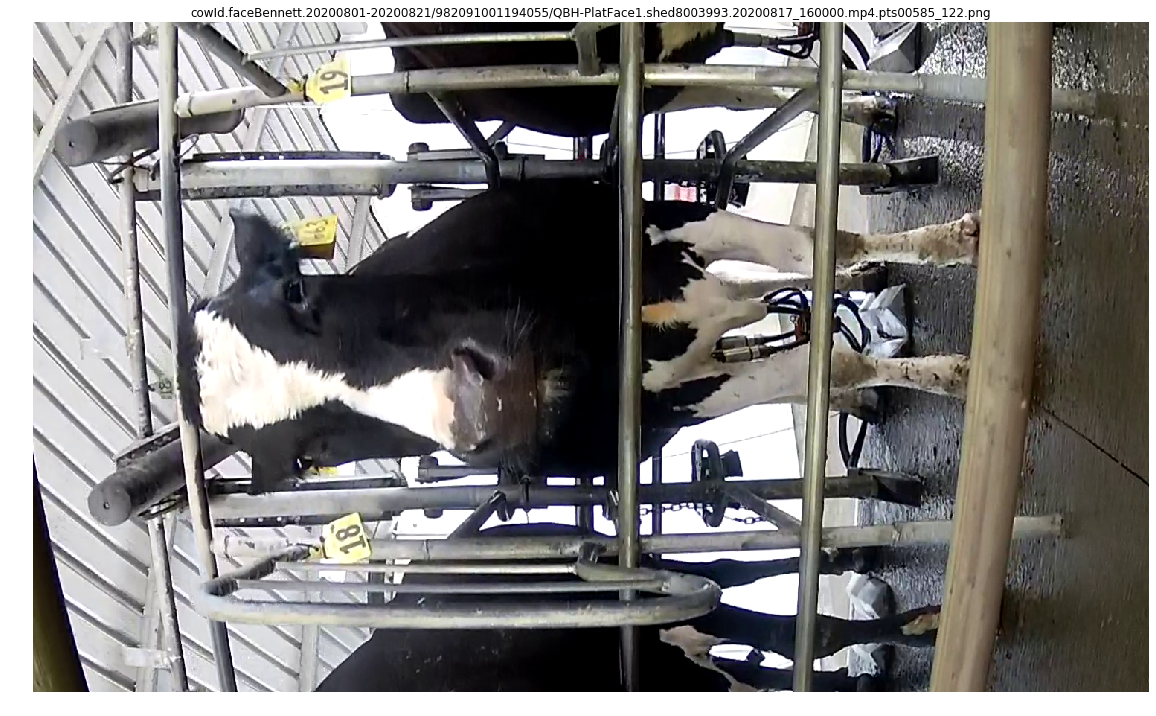

cowId.faceBennett.20200801-20200821/982091001194055/QBH-PlatFace1.shed8003993.20200817_160000.mp4.pts00585_122.png


In [10]:
id=1
imgPath=badDf[:50]['path'].tolist()[id]
_=imageLibs.showImg(imgPath,title=imgPath,cropx0y0x1y1="150,10,1650,910")
print(imgPath)